# Домашки

## Numpy

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('datasets/house_prices.csv')

### 1) corrcoef
Реализовать функцию расчета [коэффицента корреляции Пирсона](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F#%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8) для двух numpy векторов с помощью функционала numpy (без циклов)

P.S. нельзя использовать функцию np.corrcoef

In [120]:
def corrcoef(v1, v2):
  return np.sum((v1 - v1.mean()) * (v2 - v2.mean())) / (np.sqrt(np.sum((v1 - v1.mean()) ** 2) * np.sum((v2 - v2.mean()) ** 2)))

In [121]:
# Test 1
v1 = np.random.rand(100)
v2 = np.random.rand(100)
assert np.corrcoef(v1, v2)[0][1].round(8) == corrcoef(v1, v2).round(8)

In [122]:
# Test 2
v1 = np.array([1, 2, 3])
v2 = np.array([1, 2, 3])
assert np.corrcoef(v1, v2)[0][1].round(8) == corrcoef(v1, v2).round(8)

In [123]:
# Test 3
v1 = np.random.normal(loc=0, scale=1, size=100)
v2 = v1 + 0.2 * np.random.rand(100)
assert np.corrcoef(v1, v2)[0][1].round(8) == corrcoef(v1, v2).round(8)

### 2) isna
Реализовать функцию, которая принимает произвольный ndarray и возвращает ndarray с таким же shape со значениями True или False в зависимости был ли np.nan в этом месте в оригинальном ndarray

Например: для массива isna(np.array([1, 2, np.nan, 3])) -> np.array([False, False, True, False])

In [124]:
def isna(x):
    if isinstance(x, np.ndarray):
        return x != x
    else:
        return np.array(x) != np.array(x)

In [125]:
# Test 1

a = np.ones(10)
a[0] = np.nan
a[1] = None

assert (isna(a) == np.isnan(a)).all()

In [126]:
# Test 2

a = np.ones((10, 10))
a[0][5] = np.nan
a[9][2] = np.nan

assert (isna(a) == np.isnan(a)).all()

### 3) dist
Реализовать функцию dist(v1, v2), которая принимает на вход два вектора с одинаковым shape, и возвращает число - [евклидово расстояние](https://ru.wikipedia.org/wiki/Евклидова_метрика) между ними.

Так же нельзя использовать циклы и np.linagl.norm

In [127]:
def dist(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [128]:
# Test 1
v1 = np.array([0, 0, 1])
v2 = np.array([0, 0, 0])

assert dist(v1, v2).round(8) == np.linalg.norm(v1-v2).round(8)

In [129]:
# Test 2
v1 = np.array([2, 3, 1])
v2 = np.array([0, 0, 0])

assert dist(v1, v2).round(8) == np.linalg.norm(v1-v2).round(8)

In [130]:
# Test 3
v1 = np.random.rand(100)
v2 = np.random.rand(100)

assert dist(v1, v2).round(8) == np.linalg.norm(v1-v2).round(8)

## Pandas

### Анализ домов
Поиграться с датасетом цен на дома

<Axes: title={'center': 'target'}, xlabel='RoofMatl', ylabel='SalePrice'>

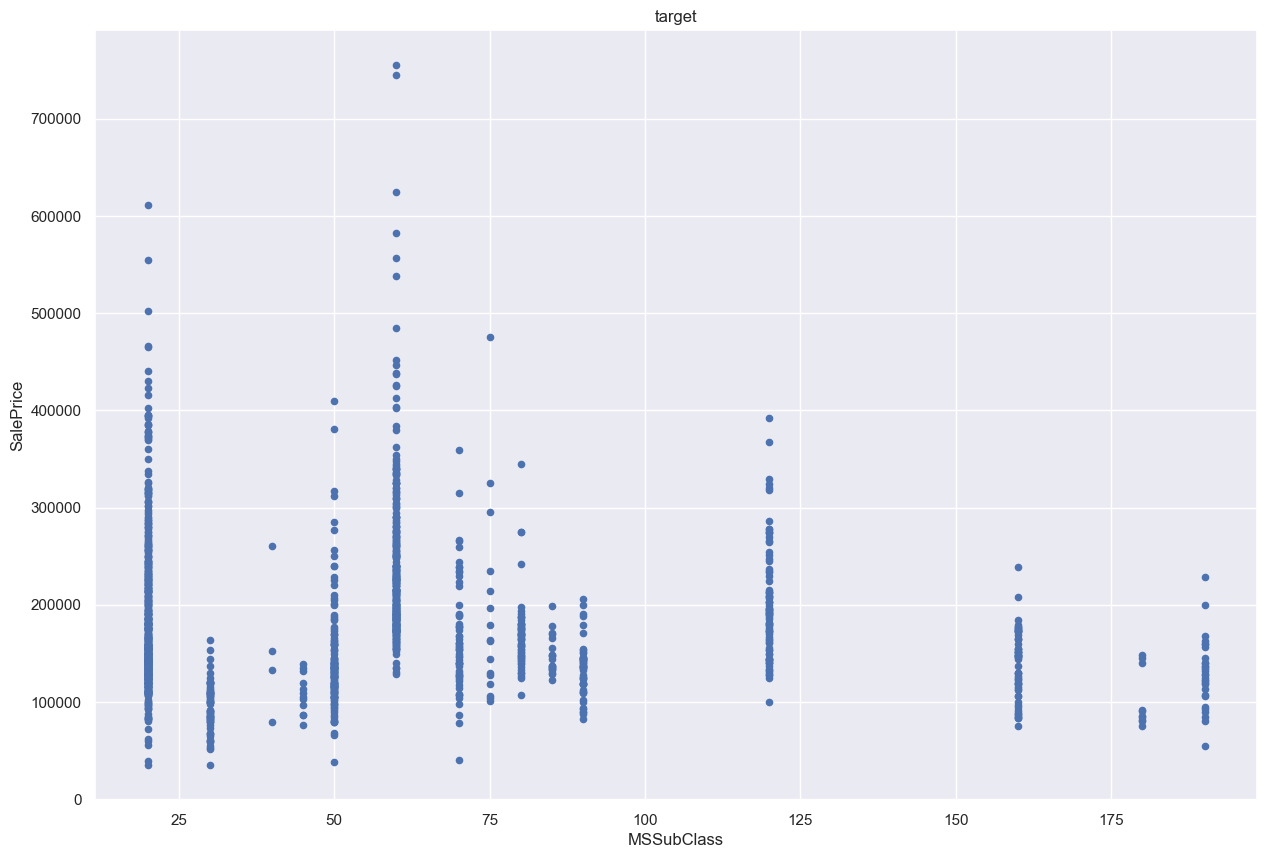

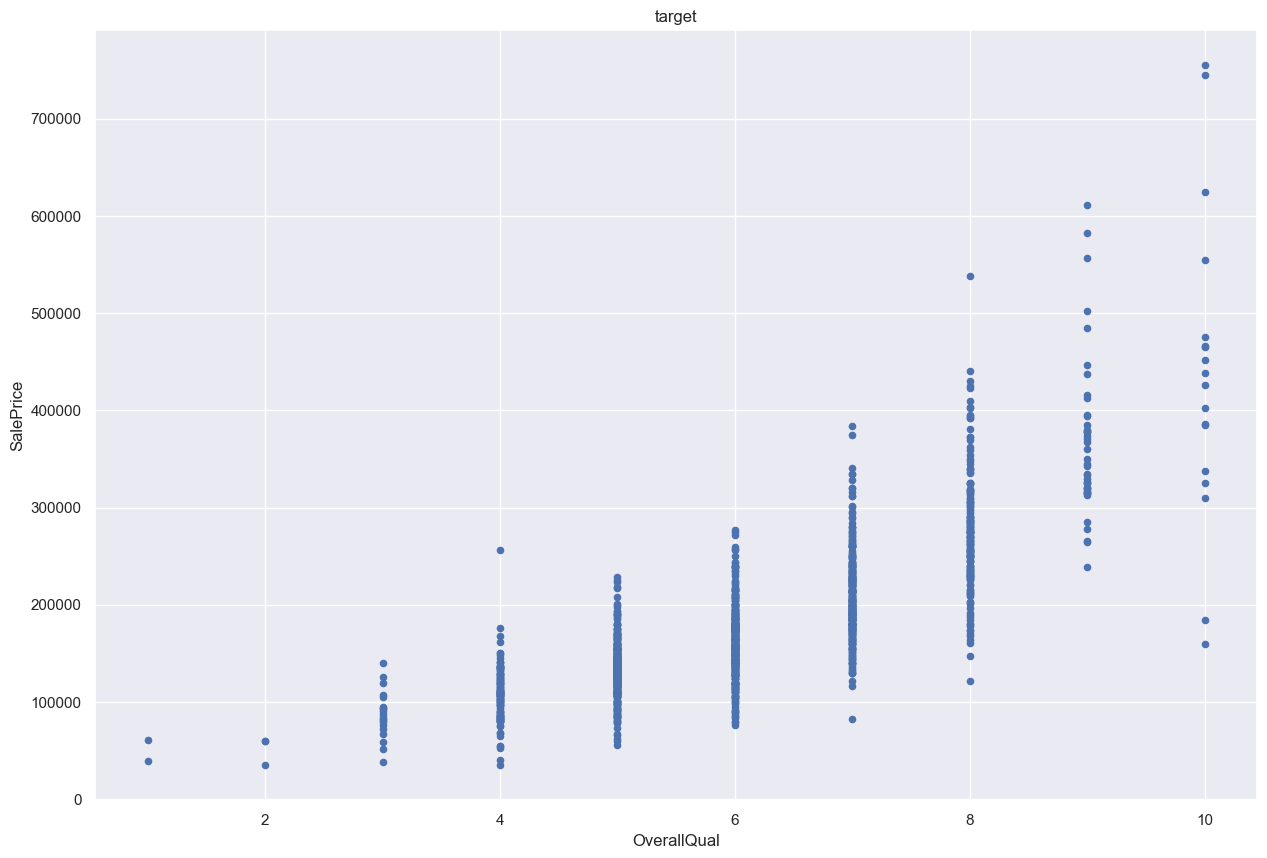

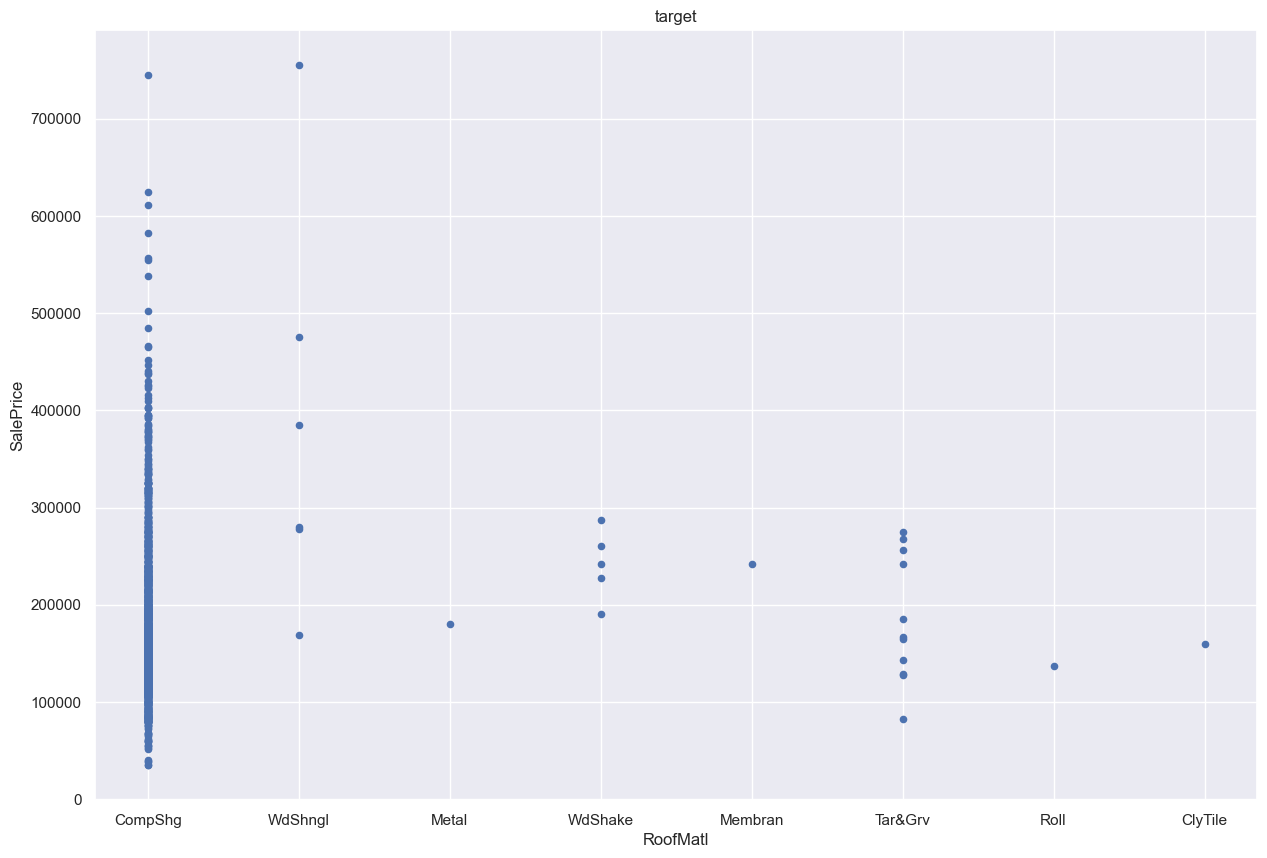

In [131]:
df.plot(kind='scatter', x='MSSubClass', y='SalePrice', title='target')
df.plot(kind='scatter', x='OverallQual', y='SalePrice', title='target')
df.plot(kind='scatter', x='RoofMatl', y='SalePrice', title='target')

array([[<Axes: title={'center': 'PoolArea'}>]], dtype=object)

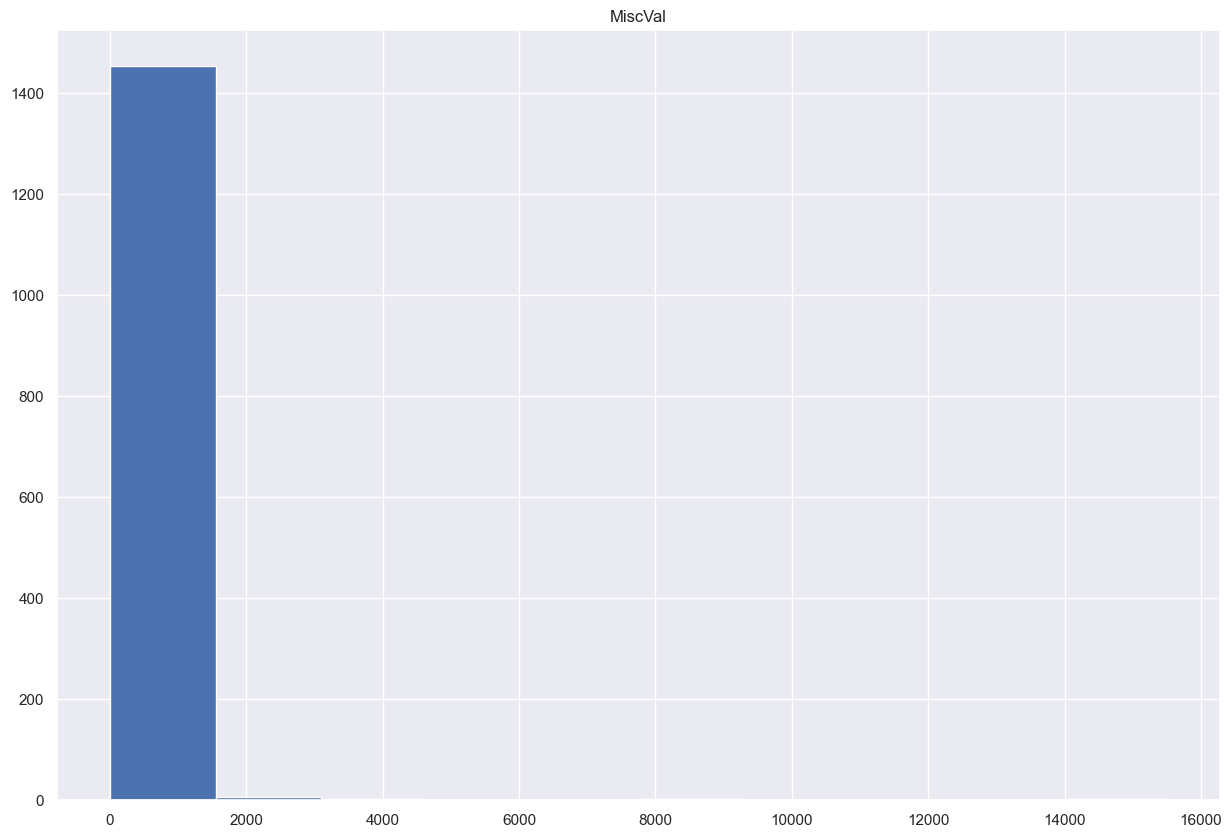

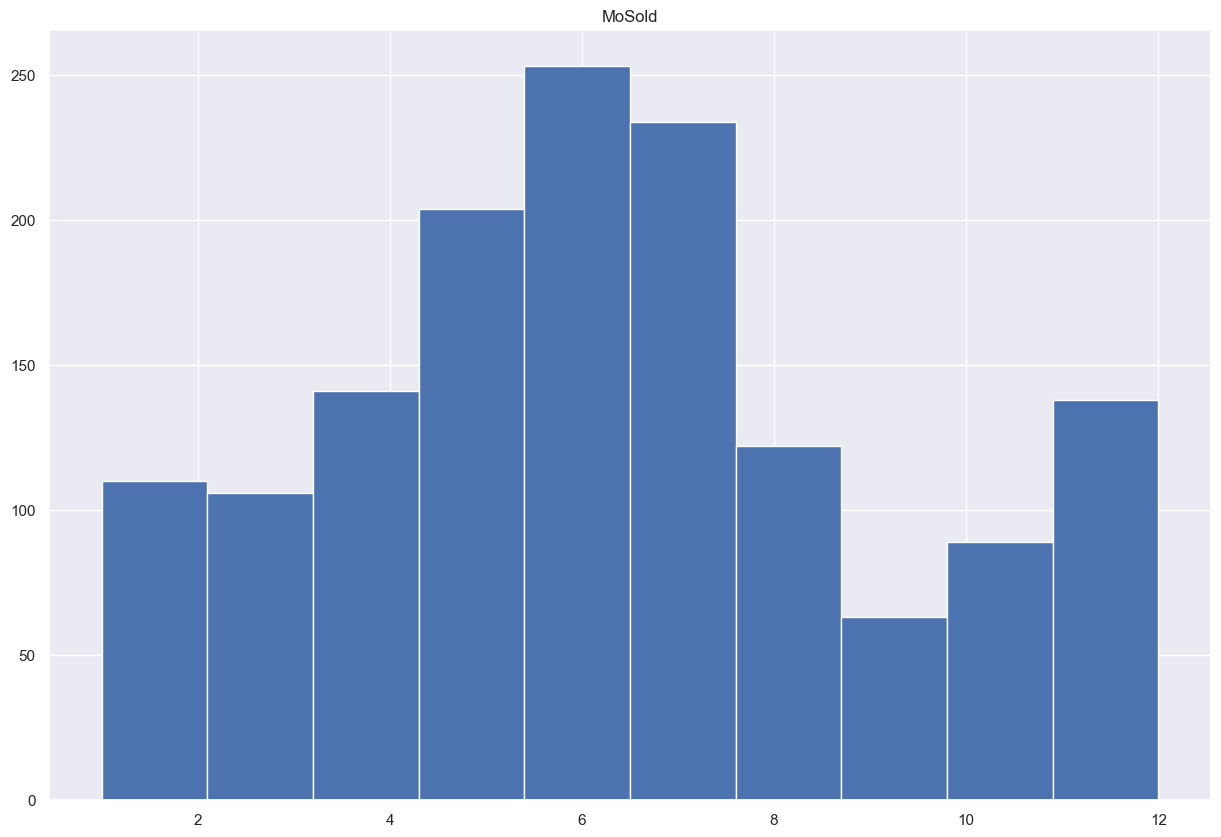

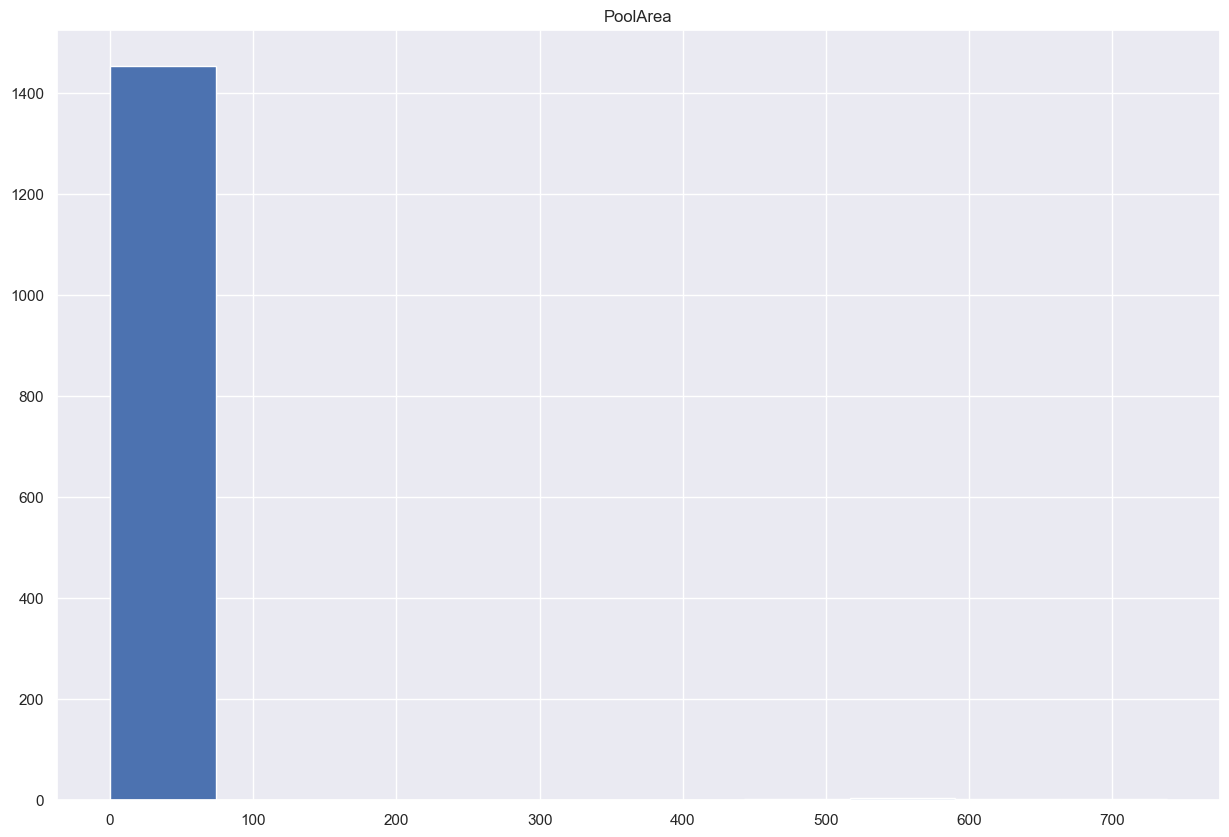

In [132]:
# Для 3 других числовых колонок построить гистограммы распределения
df.hist(column="MiscVal")
df.hist(column="MoSold")
df.hist(column="PoolArea")

In [133]:
# Посчитать среднюю цену дома с бассеином и без (PoolArea > 0 -> есть бассеин)
df_pool_area = df[df['PoolArea']>0]
sum(df_pool_area['SalePrice'])/len(df_pool_area['SalePrice'])

288138.5714285714

In [134]:
# Для 3 категориальных колонок вывести их распределение по категориям
print(df['HeatingQC'].value_counts())
print(df['KitchenQual'].value_counts())
print(df['SaleCondition'].value_counts())

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64


## Scikit-learn

### Wine

In [135]:
from sklearn.datasets import load_wine

In [136]:
wine_data = load_wine()

In [137]:
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

По образу и подобию из лекции поиграться с датасетом вин.

1. Создать pandas DataFrame
2. Порисовать графики зависимости классов вин от фичей

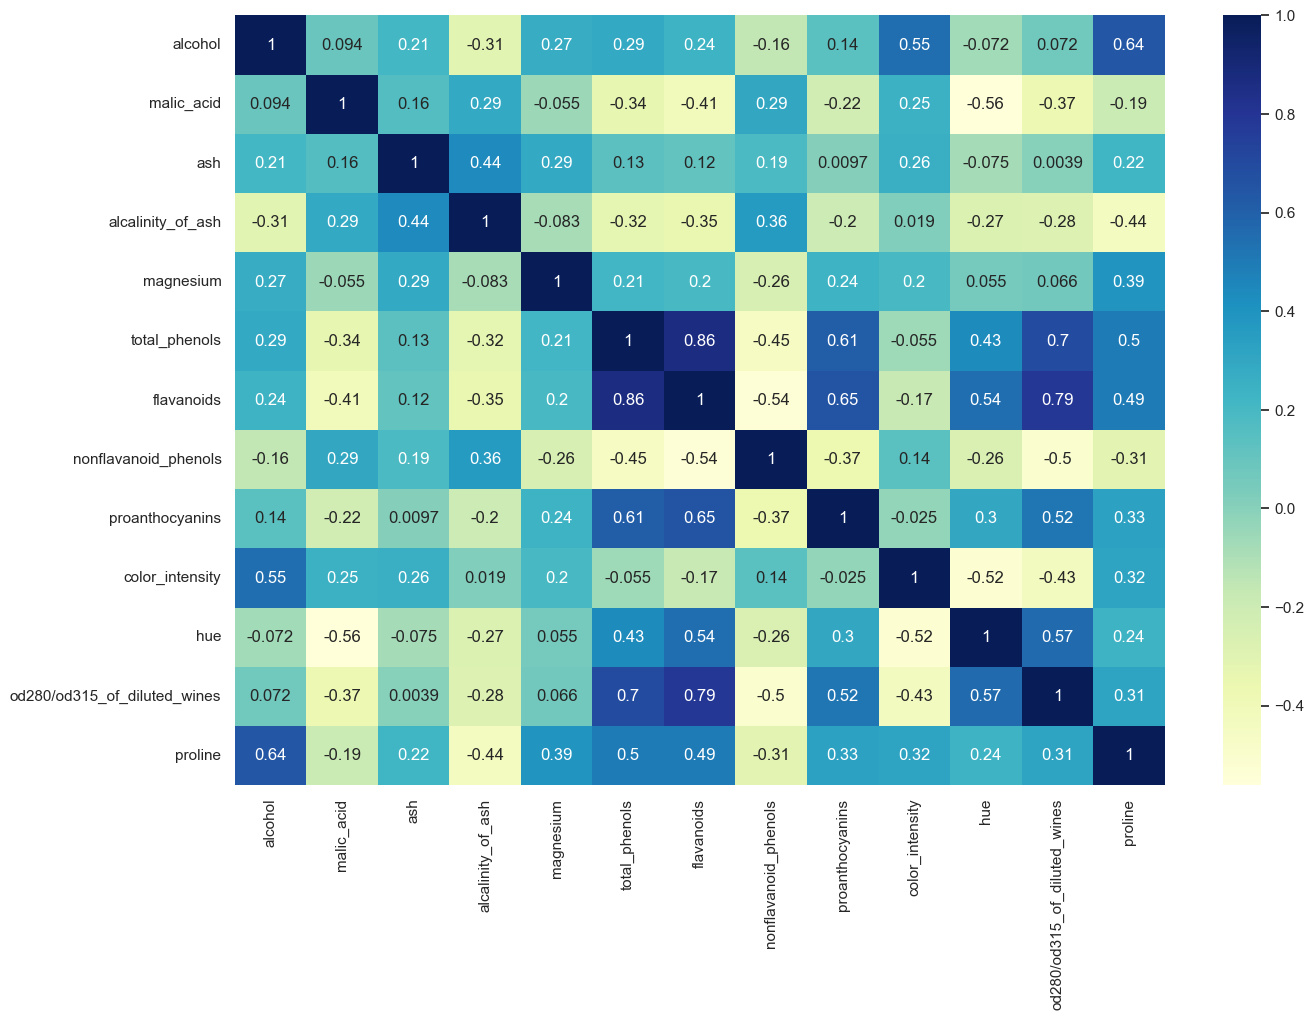

In [138]:
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

sns.set(rc={'figure.figsize':(15,10)})

sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")

plt.show()